# Think Stats 2 Chapter 5: Modeling Distributions

Think Stats 2 was written by Allen B. Downey

**The Question: Do first babies tend to be born late?**

In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import nsfg
import first
import analytic

import thinkstats2
import thinkplot

pd.options.display.max_rows = 50
pd.options.display.max_columns = 244

## Empirical vs. Analytic Distributions

The distributions we've used so far are called **empirical distributions** because they are based on empirical observations, which are necessarily finite samples.

The alternative is an **analytic distribution**, which is characterized by a CDF that is a mathematical function. Analytic distributions can be used to model empirical distributions. In this context, a **model** is a simplification that leaves out unneeded details. This chapter presents common analytic distributions and uses them to model data from a variety of sources.

## The Exponential Distribution

Here's what the exponential CDF looks like with a range of parameters.

``ReadBabyBoom()`` gets a dataFrame for births at one hospital on one day. The ``minutes`` column is just ``time`` converted to num. minutes after midnight.

We can get **Lambda (``λ``)** by dividing the number of minutes in a day (1440) by the number of births (44). This gives us ``λ = 0.0306``. 

``λ`` You can think of ``λ`` as a rate, being the number of events that can occur in a timeframe (minutes, in this case).

We can also use ``λ`` to find the mean:
``1 / λ = mean``


In [5]:
df = analytic.ReadBabyBoom()
df.sample(5, random_state=1)

,time,sex,weight_g,minutes
3,155,2,3838,115
2,118,2,3554,78
30,1825,1,2383,1105
21,1406,1,3430,846
22,1407,1,3480,847


In [35]:
# get the value differences
diffs = df.minutes.diff()
diffs.head(5)

0     NaN
1    59.0
2    14.0
3    37.0
4    62.0
Name: minutes, dtype: float64

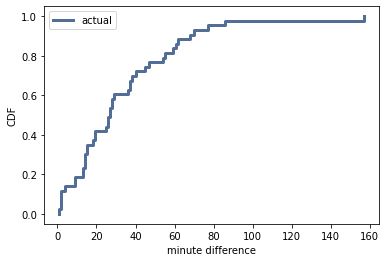

<Figure size 576x432 with 0 Axes>

In [31]:
# plot the differences in a cdf
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minute difference', ylabel='CDF')

## The Normal Distribution (AKA Gaussian)

We think that the birth weights in our NSFG data have a normal distribution. Let's take a look.

Normal Distributions are characterized by two parameters:
1. ``µ`` Mu: mean
2. ``σ`` Sigma: Standard Deviation

The **Standard Normal Distribution** occurs when ``µ`` and ``σ`` hold the following values:
* ``µ = 0`` 
* ``σ = 1`` 

One property of the standard normal distribution is that the mean is equal to the median. Because of this, CDF(0) = 0.5, since half of the values are smaller than the mean (which, as we know, is zero for standard normal distributions).



Mean, Var 7.280883100022579 1.5452125703544906
Sigma 1.2430657948614348


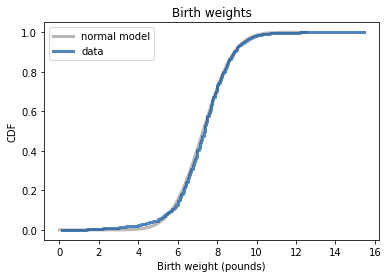

In [15]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='normal model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(weights, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Birth weights',
                 xlabel='Birth weight (pounds)',
                 ylabel='CDF')

As we can see in the above figure, the normal distribution is a good model for our data. But there is a slight discrepancy between 3 and 5 pounds. The data seems to have more babies in this range than normal. If our project's focus was on premature babies, we would need to get this part right. In that case, the normal distribution may not be the right model.

## The Normal Probability Plot

Used to identify discrepancies between the data and a model used to represent it. This helps us determine whether a model is a good representation of our data.

To create this, plot the sorted sample values vs. a randomly generated series (also sorted) with the normal standard distribution (``µ = 0`` , ``σ = 1``).

We can then view the resulting figure and see where our data varies from the normal distribution (gray line in below plot). If the resulting lines are approximately straight, the distribution is normal. Sections where the line is not straight may represent discrepancies in our data.

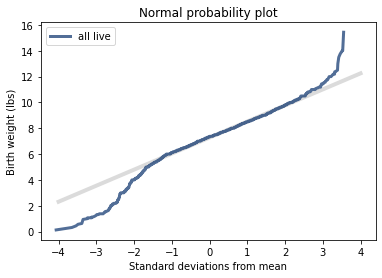

In [16]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label='all live')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

Our curve matches the model near the mean and deviates in the tail. We can see that the heaviest babies are heavier than what the model expects, and the lightest babies are lighter.

Why could this be? Well, we filtered our data to include all live births. Let's filter it again and only include full-term pregnancies of 37+ weeks. Hopefully our curve will then better fit the model, at least for the lighter babies.

In [21]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

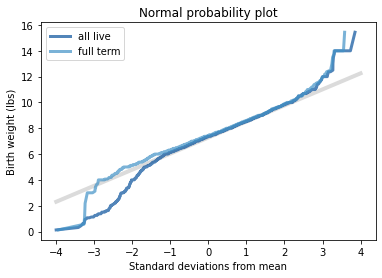

In [24]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label='all live')

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label='full term')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

The full-term data better matches the normal model. Whether or not it can be used to represent our data depends on the purpose of our analysis.

## Lognormal Distributions

Important note: Lognormal distributions take two parameters, ``µ`` and ``σ``, **but these do NOT represent the mean and standard deviation as they do in normal distributions!**

## Pareto Distributions

Two parameters:
1. $x_m$: minimum possible value
2. ``α``: scalar representing the shape of the Pareto distribution

\begin{equation*}CDF(x) = {\displaystyle 1-\left({\frac {x_{\mathrm {m} }}{x}}\right)^{\alpha }}\end{equation*}